<a href="https://colab.research.google.com/github/taruma/inkovis/blob/master/notebook/koleksi_grafik_covid19_indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Koleksi Grafik Data COVID-19 di Indonesia Menggunakan Modul Inkovis

Dataset menggunakan dari repo inkovis, baca [README](https://github.com/taruma/inkovis/blob/master/dataset/README.md) untuk lebih detail.

# INISIASI BUKU

In [1]:
try:
    import inkovis
except ModuleNotFoundError:
    !wget -O inkovis.py "https://github.com/taruma/inkovis/raw/master/notebook/inkovis.py" -q
    !wget -O so.py "https://github.com/taruma/inkovis/raw/master/notebook/so.py" -q
    import inkovis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# PENGATURAN PARAMS VISUALISASI
FIG_SIZE = (20, 8)
FIG_SIZE_GROUP = (20, 12)

-----

# DATASET

In [4]:
ALAMAT_DATASET = 'https://github.com/taruma/inkovis/raw/master/dataset/data_infeksi_covid19_indonesia.csv'
dataset_inkovis = pd.read_csv(ALAMAT_DATASET, index_col=0, parse_dates=True, header=0)
dataset_inkovis.tail()

,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
tanggal,,,,,,,,
2020-04-02,7425,1790,112,170,5635,0,0,NaN
2020-04-03,7986,1986,134,181,5715,0,0,NaN
2020-04-04,9712,2092,150,191,7620,0,0,NaN
2020-04-05,11242,2273,164,198,8869,0,0,NaN
2020-04-06,13186,2491,192,209,10695,0,0,NaN


-----

## VISUALISASI DATA

Visualisasi saya bagi menjadi 2 periode yaitu:

- Periode: 31 Hari Terakhir, dengan _step_ 1 hari (Harian)
- Periode: Seluruh Data, dengan _step_ 2 hari (Per 2 Hari)



## PERIODE: 31 Hari Terakhir (Harian)

In [5]:
# PARAM FUNGSI
DATASET = dataset_inkovis[-31:]
MASK = None
DAYS = 1

### KASUS KONFIRMASI

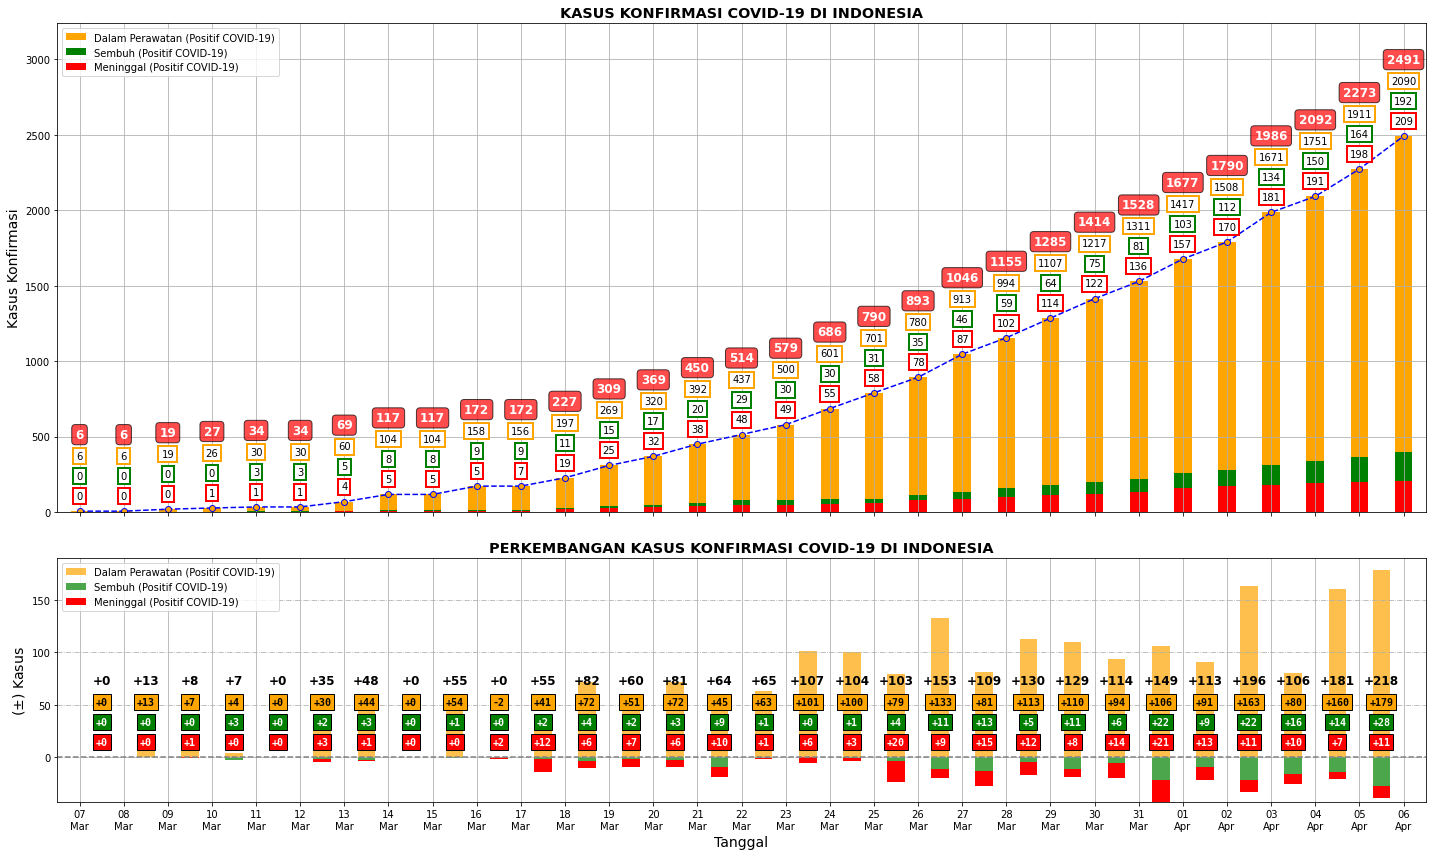

In [6]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[2, 1]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True,  
    show_numbers=True,
    show_confirmed=False, show_total_numbers=True, 
    show_title=True, show_info=False,
    show_legend=True
)
ax[0].set_xlabel('');

plt.savefig('SUM_KASUS_KONFIRMASI_HARIAN.png', dpi=150)

### JUMLAH SPESIMEN (PENGUJIAN)

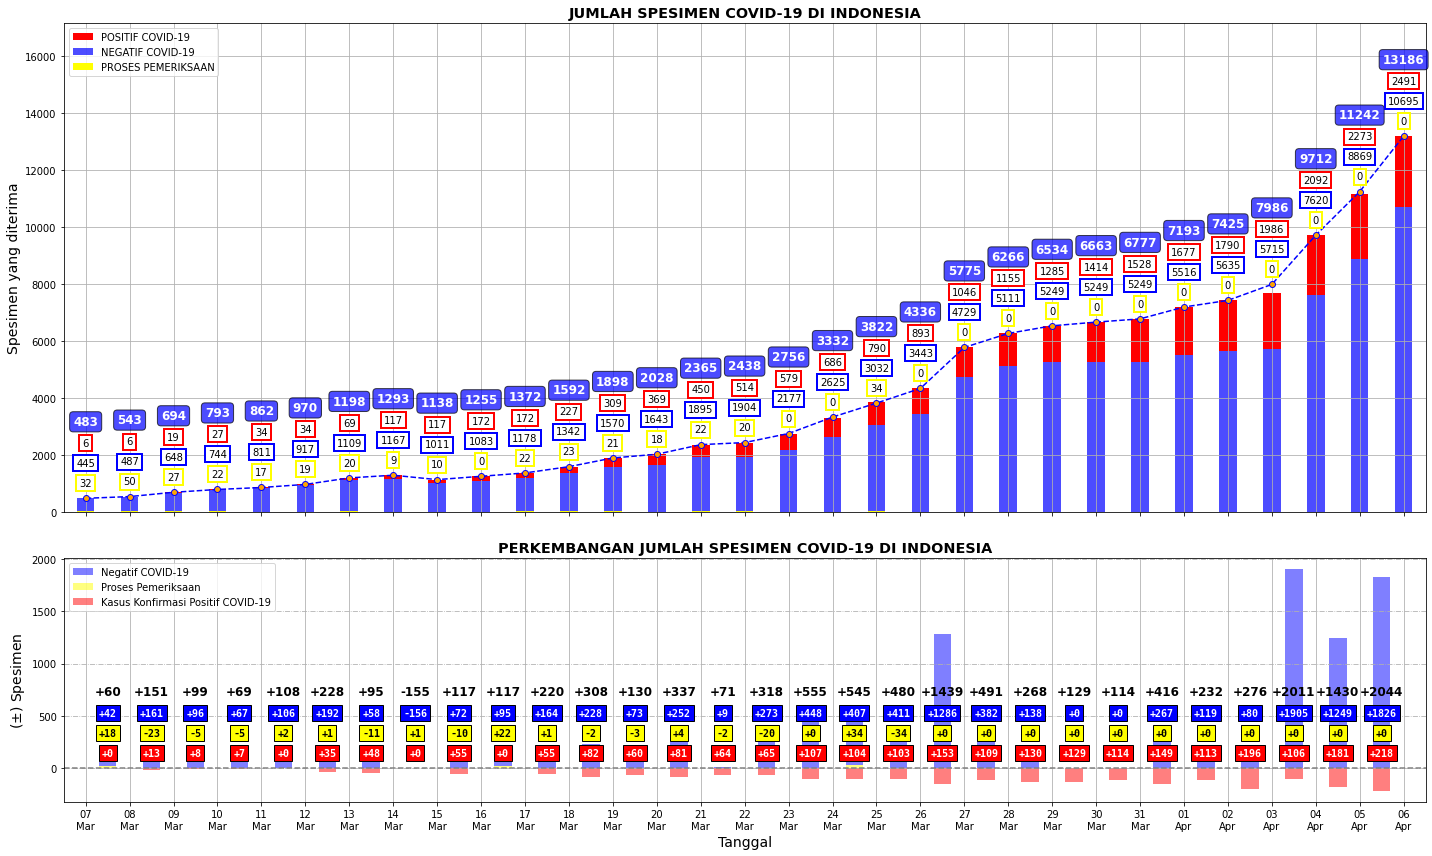

In [7]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[2, 1]})

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=True, show_title=True, show_info=False,
    show_legend=True
)

ax[0].set_xlabel('');
plt.savefig('SUM_JUMLAH_SPESIMEN_HARIAN.png', dpi=150)

### KASUS KONFIRMASI + JUMLAH SPESIMEN

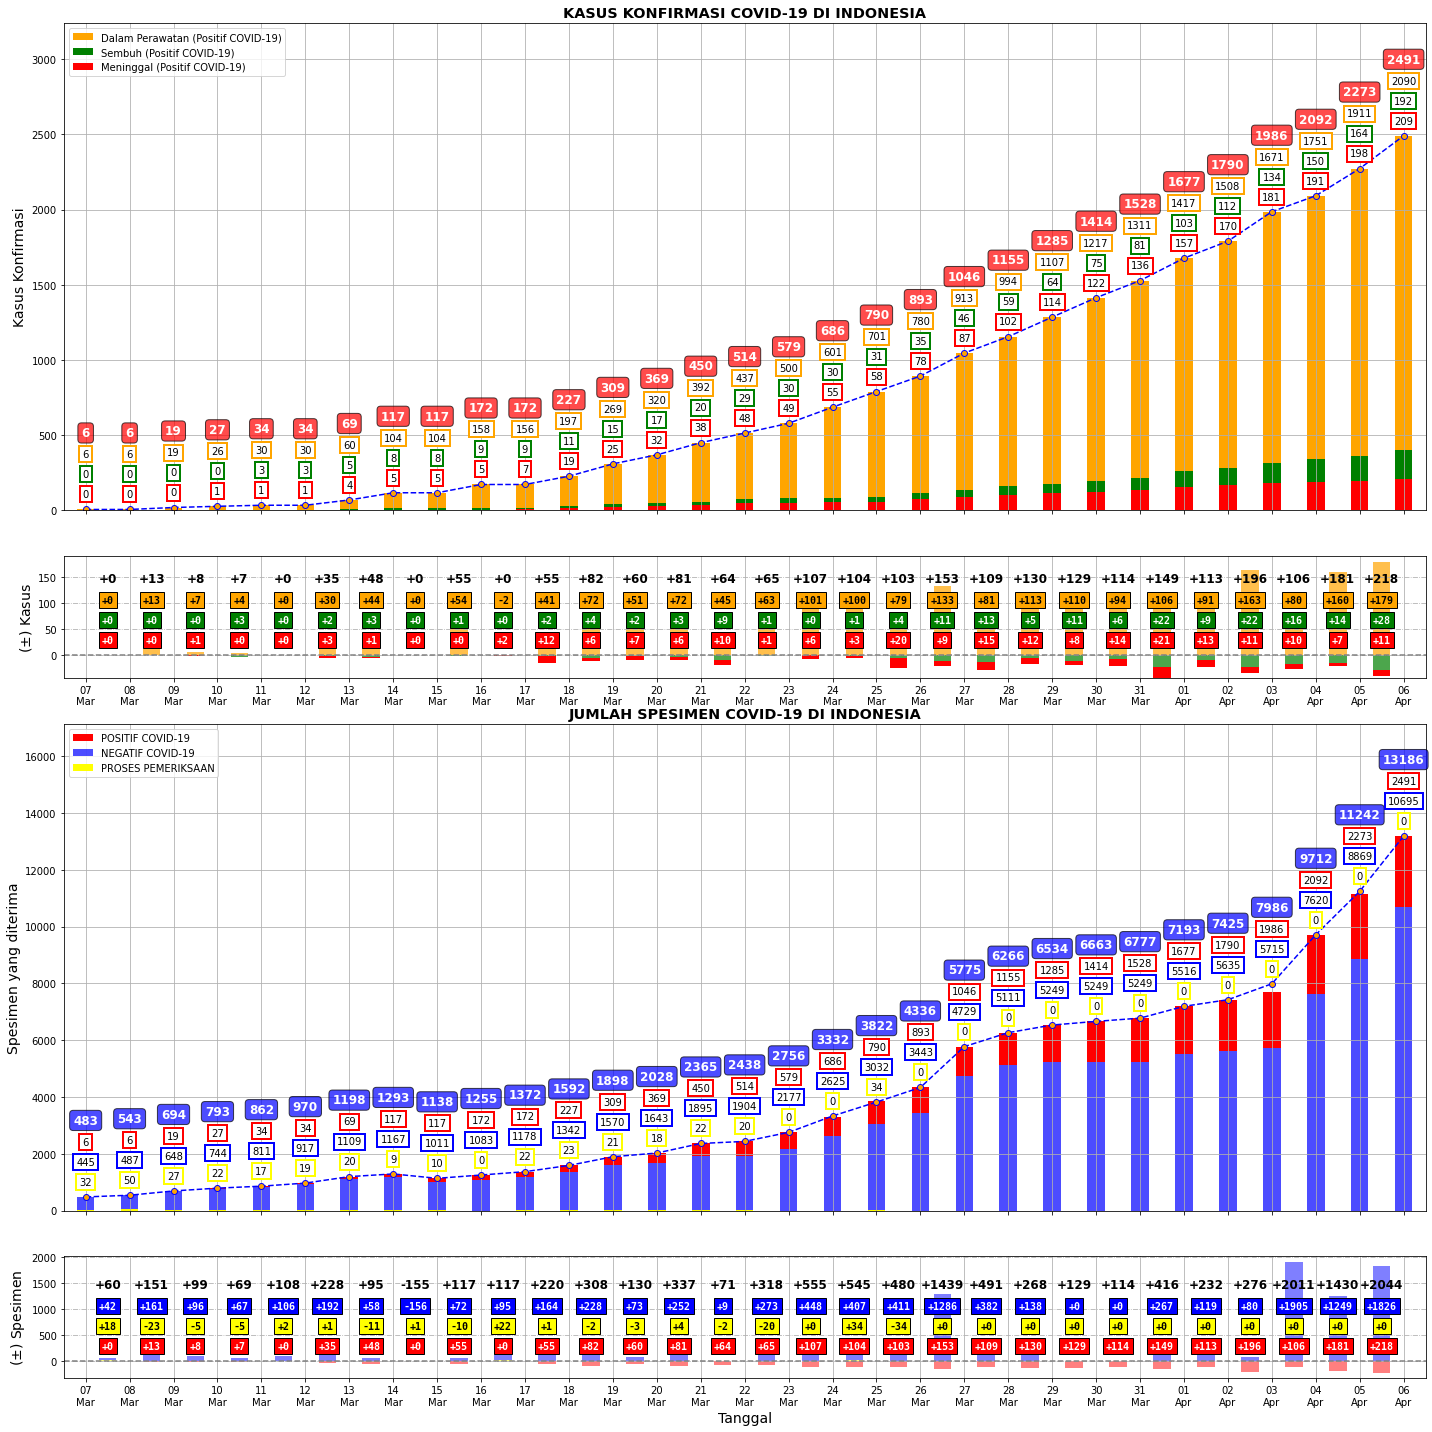

In [8]:
fig, ax = plt.subplots(
    nrows=4, ncols=1, figsize=(20, 20), sharex=True,
    gridspec_kw={'height_ratios':[2, .5, 2, .5]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True,  
    show_numbers=True,
    show_confirmed=False, show_total_numbers=True, 
    show_title=False, show_info=False,
    show_legend=False
)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[2], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[3], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('');
ax[1].set_xlabel('');
ax[1].xaxis.set_tick_params(labelbottom=True)
ax[2].set_xlabel('');

plt.savefig('SUM_COVID_HARIAN.png', dpi=150)

## PERIODE: Seluruh Data (Per 2 Hari)

In [9]:
# PARAM FUNGSI
DATASET = dataset_inkovis
MASK = None
DAYS = 2

### KASUS KONFIRMASI

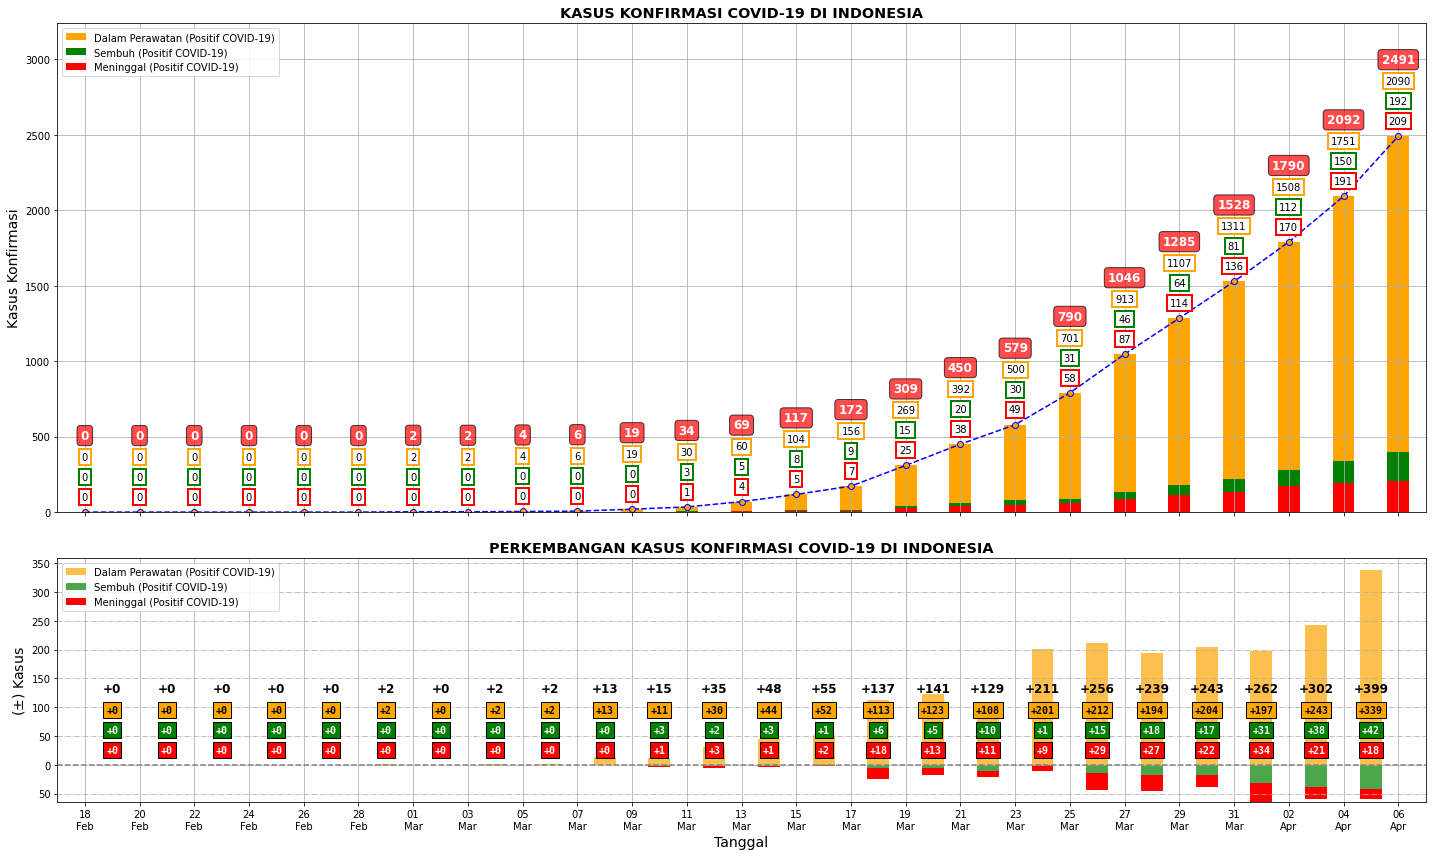

In [10]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[2, 1]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True,  
    show_numbers=True,
    show_confirmed=False, show_total_numbers=True, 
    show_title=True, show_info=False,
    show_legend=True
)
ax[0].set_xlabel('');

plt.savefig('SUM_KASUS_KONFIRMASI_PER2HARI.png', dpi=150)

### JUMLAH SPESIMEN 

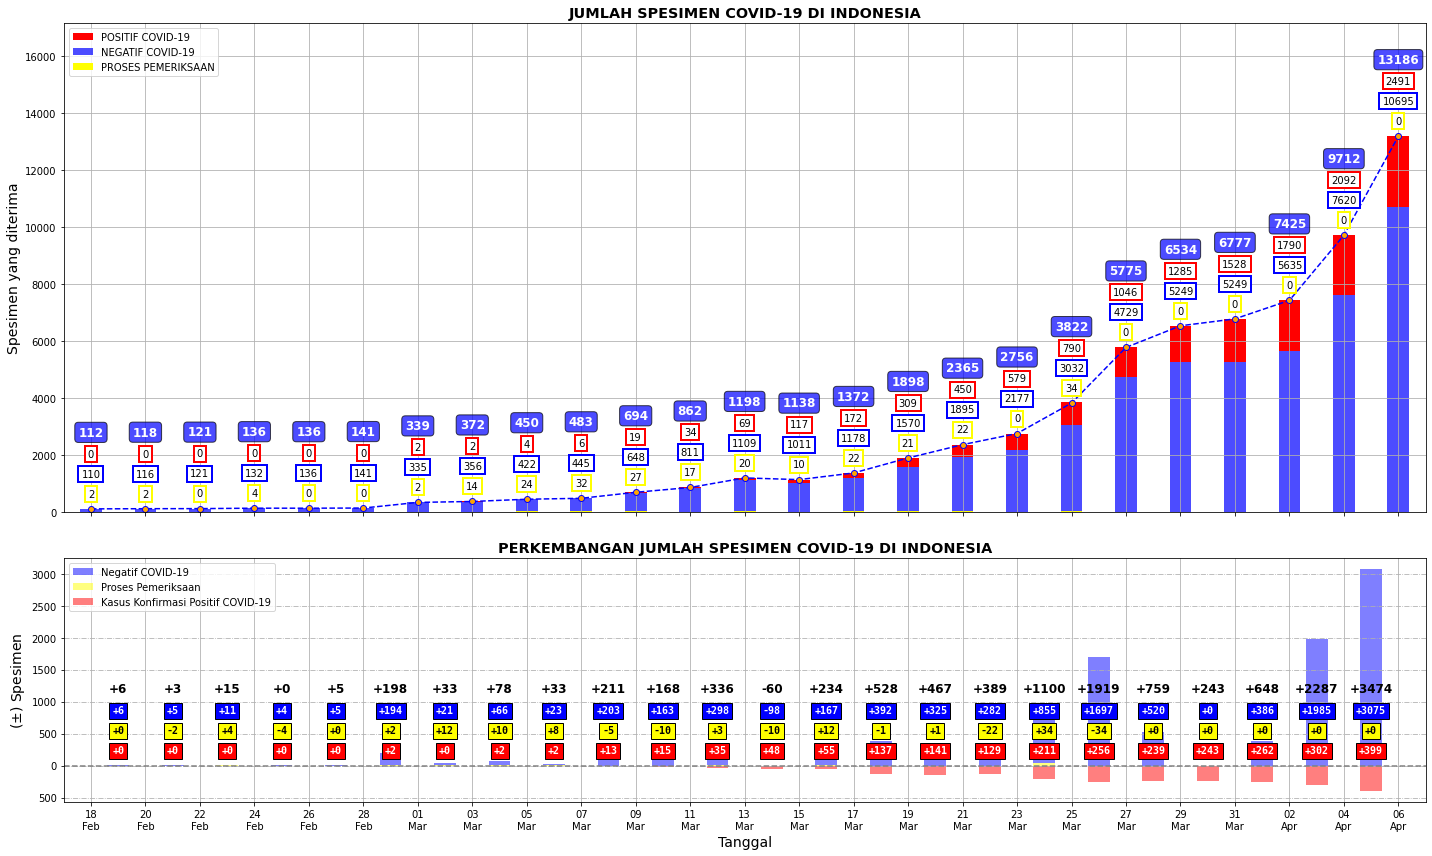

In [11]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[2, 1]})

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=True, show_title=True, show_info=False,
    show_legend=True
)

ax[0].set_xlabel('');
plt.savefig('SUM_JUMLAH_SPESIMEN_PER2HARI.png', dpi=150)

### KASUS KONFIRMASI + JUMLAH SPESIMEN

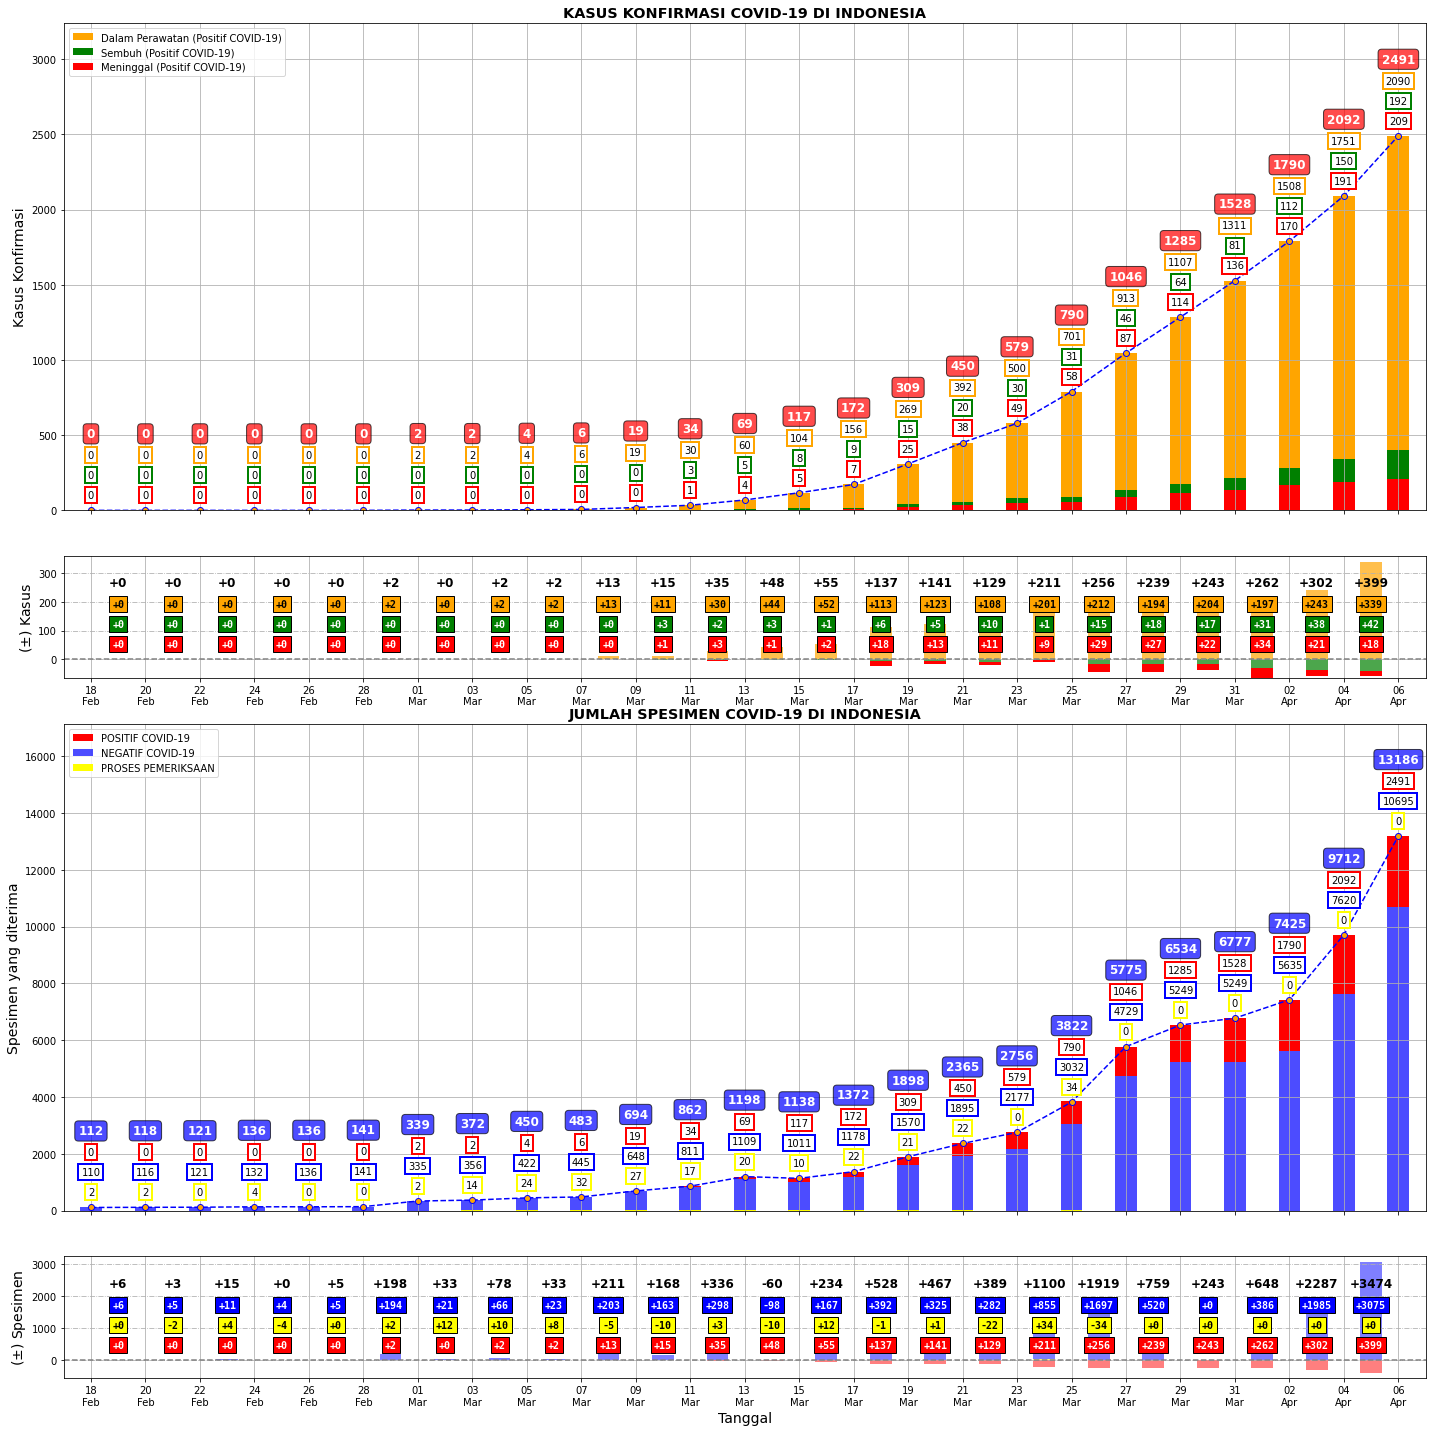

In [12]:
fig, ax = plt.subplots(
    nrows=4, ncols=1, figsize=(20, 20), sharex=True,
    gridspec_kw={'height_ratios':[2, .5, 2, .5]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True,  
    show_numbers=True,
    show_confirmed=False, show_total_numbers=True, 
    show_title=False, show_info=False,
    show_legend=False
)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[2], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=True
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[3], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=False, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('');
ax[1].set_xlabel('');
ax[1].xaxis.set_tick_params(labelbottom=True)
ax[2].set_xlabel('');

plt.savefig('SUM_COVID_PER2HARI.png', dpi=150)